In [85]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.corpus import stopwords

# Preprocessing the Data

In [86]:
#reading in the Reuters data
main_directory = '/Users/bethelkim/Downloads/STA380-master/data/ReutersC50/C50test'

In [87]:
#preprocessing 
author_file_paths = []

for author_folder in os.listdir(main_directory):
    author_folder_path = os.path.join(main_directory, author_folder)
    if os.path.isdir(author_folder_path):
        author_files = [os.path.join(author_folder_path, file) for file in os.listdir(author_folder_path) if file.endswith('.txt')]
        author_file_paths.extend(author_files)


In [88]:
#more preprocessing
data = []

for file_path in author_file_paths:
    author = os.path.basename(os.path.dirname(file_path))
    file_name = os.path.basename(file_path)
    with open(file_path, 'r', encoding = 'utf-8') as file:
        content = file.read()
    data.append({'Author': author, 'File': file_name, 'Content': content})

In [89]:
#creates dataframe to work with 
df = pd.DataFrame(data)
df.drop(columns=['File'], inplace=True)
df

#more preprocessing
df['preprocessed_content'] = df['Content'].apply(preprocess)

# K-Means and PCA for Word Clustering for Content

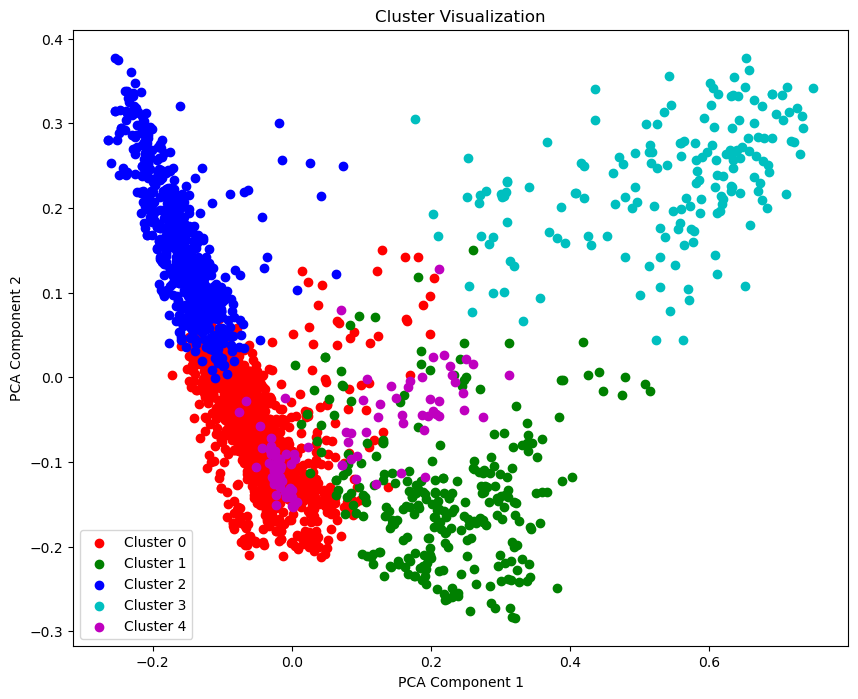

In [90]:
# Convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_content'])

# Apply K-Means clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['cluster_label'] = kmeans.fit_predict(tfidf_matrix)
df['cluster_label']

# Dimensionality Reduction (PCA for visualization)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

df['pca_1'] = tfidf_reduced[:, 0]
df['pca_2'] = tfidf_reduced[:, 1]

# Create a cluster plot
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for cluster_label, color in zip(range(n_clusters), colors):
    cluster_data = df[df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data['pca_1'], cluster_data['pca_2'], c = color, label = f'Cluster {cluster_label}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

In [91]:
#produces loadings for each feature point

pca = PCA(n_components = 2)  # Reduce to 2 dimensions for visualization
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

# Access the loadings (coefficients) of original features for PCA 1 and PCA 2
loadings_pca1 = pca.components_[0]
loadings_pca2 = pca.components_[1]

# Print the loadings and their corresponding feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

for feature_name, loading_pca1, loading_pca2 in zip(feature_names, loadings_pca1, loadings_pca2):
    print(f"Feature: {feature_name}, PCA 1 Loading: {loading_pca1:.4f}, PCA 2 Loading: {loading_pca2:.4f}")

Feature: able, PCA 1 Loading: -0.0015, PCA 2 Loading: -0.0025
Feature: access, PCA 1 Loading: 0.0014, PCA 2 Loading: -0.0178
Feature: according, PCA 1 Loading: -0.0050, PCA 2 Loading: 0.0005
Feature: account, PCA 1 Loading: -0.0060, PCA 2 Loading: 0.0030
Feature: accounts, PCA 1 Loading: -0.0062, PCA 2 Loading: 0.0041
Feature: acquisition, PCA 1 Loading: -0.0274, PCA 2 Loading: 0.0274
Feature: acquisitions, PCA 1 Loading: -0.0211, PCA 2 Loading: 0.0308
Feature: across, PCA 1 Loading: 0.0021, PCA 2 Loading: 0.0018
Feature: action, PCA 1 Loading: 0.0055, PCA 2 Loading: -0.0213
Feature: activities, PCA 1 Loading: 0.0021, PCA 2 Loading: -0.0030
Feature: activity, PCA 1 Loading: -0.0005, PCA 2 Loading: -0.0065
Feature: add, PCA 1 Loading: -0.0066, PCA 2 Loading: 0.0055
Feature: added, PCA 1 Loading: -0.0208, PCA 2 Loading: 0.0233
Feature: adding, PCA 1 Loading: -0.0072, PCA 2 Loading: 0.0015
Feature: addition, PCA 1 Loading: -0.0045, PCA 2 Loading: 0.0009
Feature: administration, PCA 1 Load

# K-Means and PCA for Clustering by Author

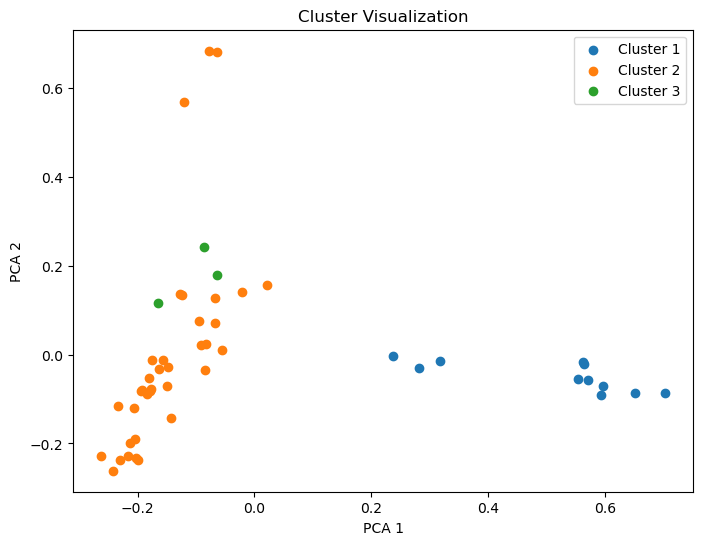

               Author  cluster_label
0       AaronPressman              1
1          AlanCrosby              1
2      AlexanderSmith              1
3     BenjaminKangLim              0
4       BernardHickey              1
5         BradDorfman              1
6    DarrenSchuettler              2
7         DavidLawder              1
8       EdnaFernandes              1
9         EricAuchard              1
10     FumikoFujisaki              1
11     GrahamEarnshaw              0
12   HeatherScoffield              2
13         JanLopatka              1
14      JaneMacartney              0
15       JimGilchrist              0
16     JoWinterbottom              1
17           JoeOrtiz              1
18       JohnMastrini              1
19       JonathanBirt              1
20        KarlPenhaul              1
21          KeithWeir              1
22     KevinDrawbaugh              1
23      KevinMorrison              1
24      KirstinRidley              1
25  KouroshKarimkhany              1
2

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#groups data by Author
df_grouped = df.groupby('Author')['Content'].apply(' '.join).reset_index()

# TF-IDF Vectorization
stop_words = stopwords.words("english")
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_grouped['Content'])

# KMeans Clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to the DataFrame
df_grouped['cluster_label'] = kmeans.labels_

# Dimensionality Reduction (PCA for visualization)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
df_grouped['pca_1'] = reduced_features[:, 0]
df_grouped['pca_2'] = reduced_features[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = df_grouped[df_grouped['cluster_label'] == cluster]
    plt.scatter(cluster_data['pca_1'], cluster_data['pca_2'], label=f'Cluster {cluster + 1}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

# Print the cluster results
print(df_grouped[['Author', 'cluster_label']])